In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Preparation

In [2]:
points = np.array([(5, 7), (15, 12), (16, 18), (6, 6), (16, 11), (15, 11), (6, 4), (13, 13), (16, 17), (5, 5), (15, 17),
                   (16, 17), (6, 8), (14, 12), (16, 15)])
centroids = np.array([(5, 12), (15, 4), (10, 17)])
ppx, ppy = points[:, 0],points[:, 1]
ccx, ccy = centroids[:, 0],centroids[:, 1]

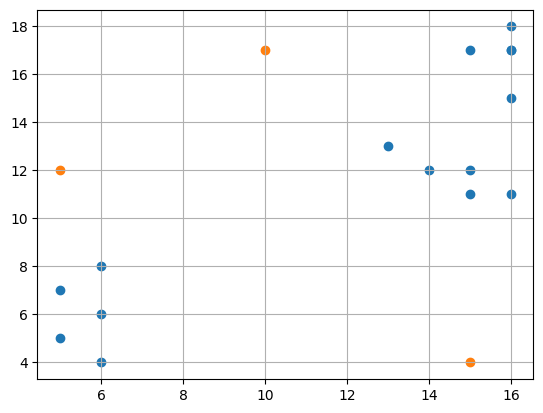

In [3]:
plt.scatter(ppx, ppy)
plt.scatter(ccx, ccy)
plt.grid()
plt.show()

# Processing

In [4]:
def clustering(points, centroids, k):
    # Initiate empty clusters
    clusters = {}
    # Set the range for value of k (number of centroids)
    for i in range(k):
        clusters[i] = []
    # Calculate euclidean distance between a point and 3 centroids
    for data in points:
        euc_dist = []
        print("Point",data[0],data[1])
        for j in range(k):
            temp = data - centroids[j]
            calculation = np.sqrt(np.dot(temp.T, temp))
            euc_dist.append(calculation)
            print(centroids[j],"->",round(calculation,2))
        # Assign each object to the ckuster with the nearest seed point.
        clusters[euc_dist.index(min(euc_dist))].append(data)
        print("\n")
    return clusters

In [5]:
def calculate_centroids(centroids, clusters, k):
    for i in range(k):
        # compute seed points as the centroids of the clusters of the current partition
        centroids[i] = np.average(clusters[i], axis=0)
    return centroids

In [6]:
# from matplotlib.patches import Circle
def plot_clusters(clusters, centroids):
    fig, axs = plt.subplots(1, 2, figsize=(16, 6))

    # Left subplot
    axs[0].scatter(ppx, ppy)
    axs[0].scatter(ccx, ccy)
    axs[0].grid()
    axs[0].set_title('Scatter Plot of Points')
    axs[0].set_xlabel('X')
    axs[0].set_ylabel('Y')
    
    # Right subplot: Clustered scatter plot with centroids and circles
    axs[1].set_title('Clustered Scatter Plot with Centroids and Circles')
    axs[1].set_xlabel('X')
    axs[1].set_ylabel('Y')

    colors = ['r', 'g', 'b', 'y', 'c', 'm']
    for i, cluster in enumerate(clusters.values()):
        cluster_points = np.array(cluster)
        axs[1].scatter(cluster_points[:, 0], cluster_points[:, 1], color=colors[i], label=f'Cluster {i}')

    axs[1].scatter(centroids[:, 0], centroids[:, 1], color='k', marker='x', s=100, label='Centroids')

    # for i, centroid in enumerate(centroids):
    #     circle = Circle(centroid, radius=2, fill=False, color='k', linestyle='--', linewidth=1.5)
    #     axs[1].add_patch(circle)

    axs[1].legend()
    axs[1].grid(True)

    plt.tight_layout()
    plt.show()

# Calculation 3 Iterations

In [7]:
clusters = {}

Point 5 7
[ 5 12] -> 5.0
[15  4] -> 10.44
[10 17] -> 11.18


Point 15 12
[ 5 12] -> 10.0
[15  4] -> 8.0
[10 17] -> 7.07


Point 16 18
[ 5 12] -> 12.53
[15  4] -> 14.04
[10 17] -> 6.08


Point 6 6
[ 5 12] -> 6.08
[15  4] -> 9.22
[10 17] -> 11.7


Point 16 11
[ 5 12] -> 11.05
[15  4] -> 7.07
[10 17] -> 8.49


Point 15 11
[ 5 12] -> 10.05
[15  4] -> 7.0
[10 17] -> 7.81


Point 6 4
[ 5 12] -> 8.06
[15  4] -> 9.0
[10 17] -> 13.6


Point 13 13
[ 5 12] -> 8.06
[15  4] -> 9.22
[10 17] -> 5.0


Point 16 17
[ 5 12] -> 12.08
[15  4] -> 13.04
[10 17] -> 6.0


Point 5 5
[ 5 12] -> 7.0
[15  4] -> 10.05
[10 17] -> 13.0


Point 15 17
[ 5 12] -> 11.18
[15  4] -> 13.0
[10 17] -> 5.0


Point 16 17
[ 5 12] -> 12.08
[15  4] -> 13.04
[10 17] -> 6.0


Point 6 8
[ 5 12] -> 4.12
[15  4] -> 9.85
[10 17] -> 9.85


Point 14 12
[ 5 12] -> 9.0
[15  4] -> 8.06
[10 17] -> 6.4


Point 16 15
[ 5 12] -> 11.4
[15  4] -> 11.05
[10 17] -> 6.32




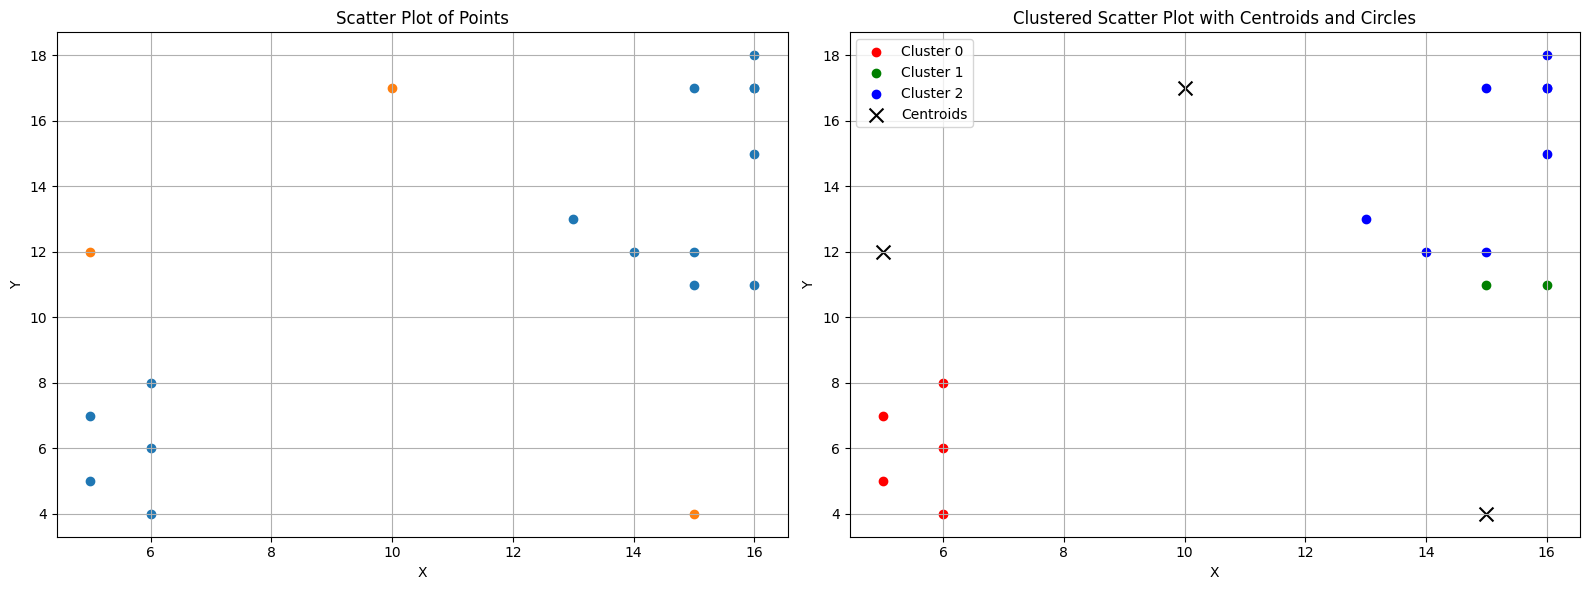

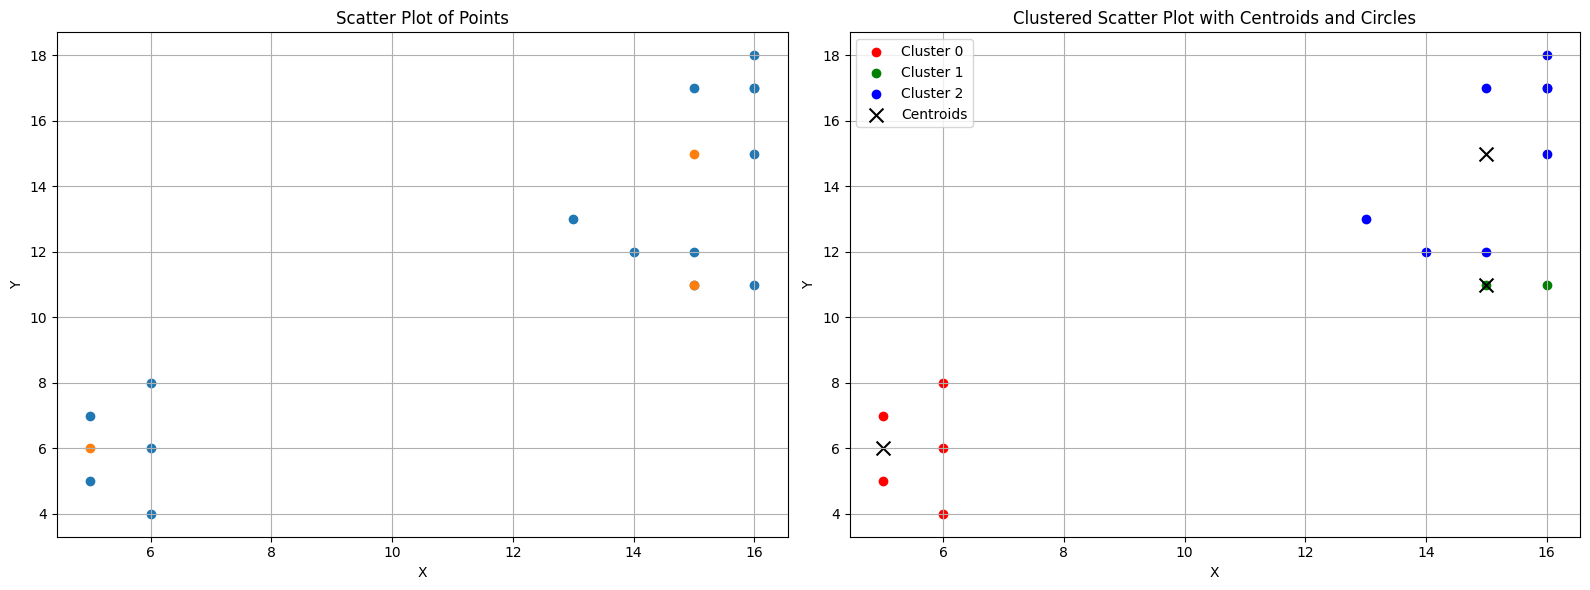

Point 5 7
[5 6] -> 1.0
[15 11] -> 10.77
[15 15] -> 12.81


Point 15 12
[5 6] -> 11.66
[15 11] -> 1.0
[15 15] -> 3.0


Point 16 18
[5 6] -> 16.28
[15 11] -> 7.07
[15 15] -> 3.16


Point 6 6
[5 6] -> 1.0
[15 11] -> 10.3
[15 15] -> 12.73


Point 16 11
[5 6] -> 12.08
[15 11] -> 1.0
[15 15] -> 4.12


Point 15 11
[5 6] -> 11.18
[15 11] -> 0.0
[15 15] -> 4.0


Point 6 4
[5 6] -> 2.24
[15 11] -> 11.4
[15 15] -> 14.21


Point 13 13
[5 6] -> 10.63
[15 11] -> 2.83
[15 15] -> 2.83


Point 16 17
[5 6] -> 15.56
[15 11] -> 6.08
[15 15] -> 2.24


Point 5 5
[5 6] -> 1.0
[15 11] -> 11.66
[15 15] -> 14.14


Point 15 17
[5 6] -> 14.87
[15 11] -> 6.0
[15 15] -> 2.0


Point 16 17
[5 6] -> 15.56
[15 11] -> 6.08
[15 15] -> 2.24


Point 6 8
[5 6] -> 2.24
[15 11] -> 9.49
[15 15] -> 11.4


Point 14 12
[5 6] -> 10.82
[15 11] -> 1.41
[15 15] -> 3.16


Point 16 15
[5 6] -> 14.21
[15 11] -> 4.12
[15 15] -> 1.0




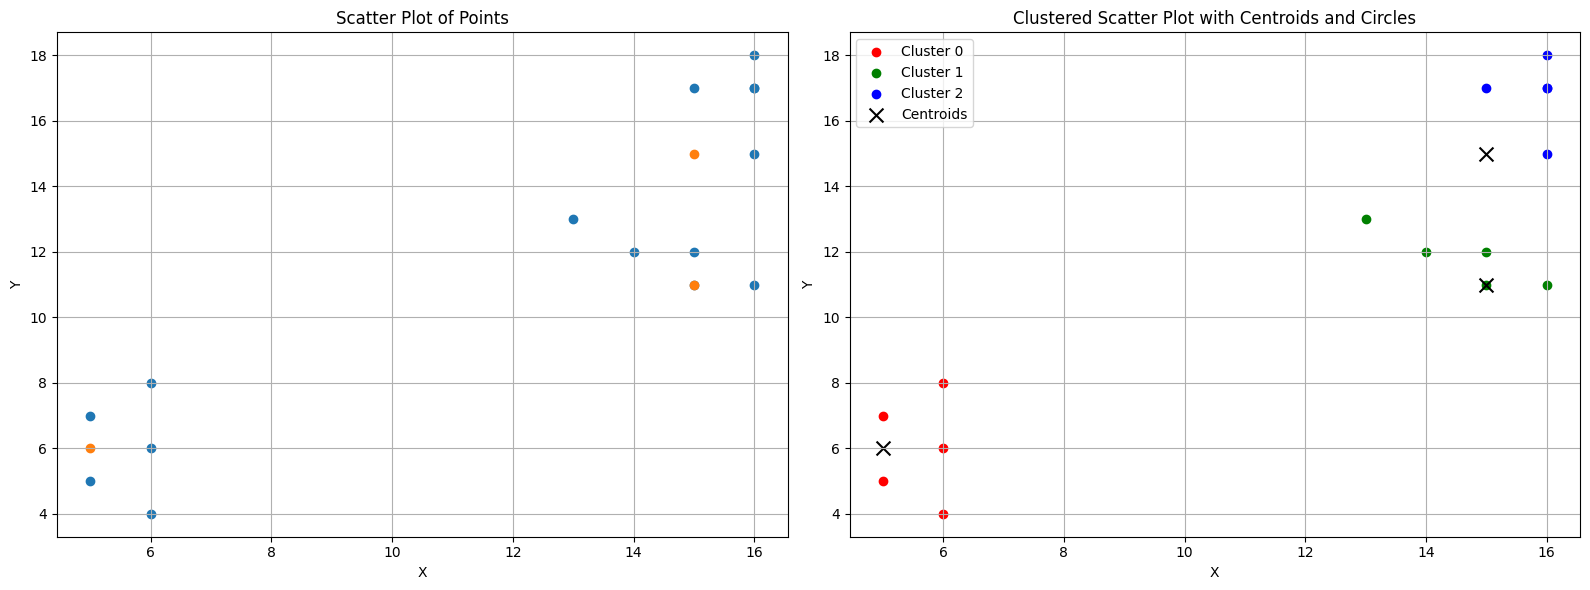

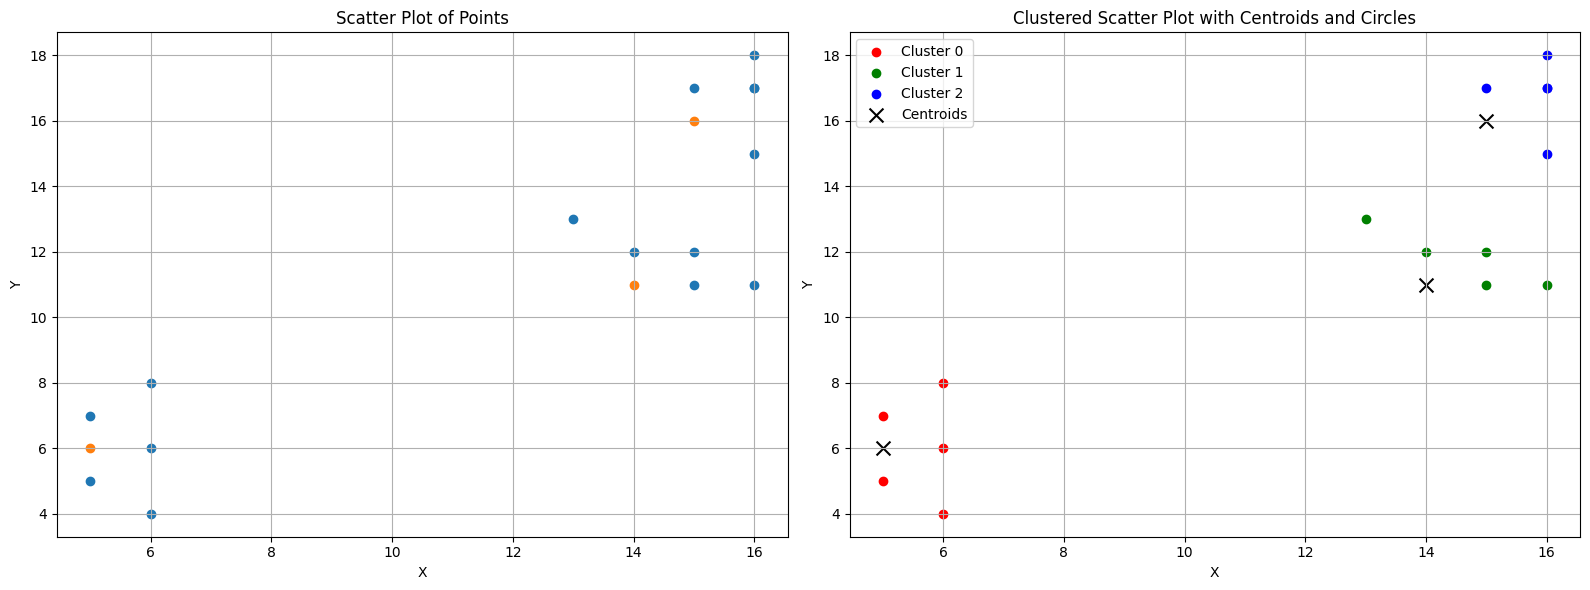

Point 5 7
[5 6] -> 1.0
[14 11] -> 9.85
[15 16] -> 13.45


Point 15 12
[5 6] -> 11.66
[14 11] -> 1.41
[15 16] -> 4.0


Point 16 18
[5 6] -> 16.28
[14 11] -> 7.28
[15 16] -> 2.24


Point 6 6
[5 6] -> 1.0
[14 11] -> 9.43
[15 16] -> 13.45


Point 16 11
[5 6] -> 12.08
[14 11] -> 2.0
[15 16] -> 5.1


Point 15 11
[5 6] -> 11.18
[14 11] -> 1.0
[15 16] -> 5.0


Point 6 4
[5 6] -> 2.24
[14 11] -> 10.63
[15 16] -> 15.0


Point 13 13
[5 6] -> 10.63
[14 11] -> 2.24
[15 16] -> 3.61


Point 16 17
[5 6] -> 15.56
[14 11] -> 6.32
[15 16] -> 1.41


Point 5 5
[5 6] -> 1.0
[14 11] -> 10.82
[15 16] -> 14.87


Point 15 17
[5 6] -> 14.87
[14 11] -> 6.08
[15 16] -> 1.0


Point 16 17
[5 6] -> 15.56
[14 11] -> 6.32
[15 16] -> 1.41


Point 6 8
[5 6] -> 2.24
[14 11] -> 8.54
[15 16] -> 12.04


Point 14 12
[5 6] -> 10.82
[14 11] -> 1.0
[15 16] -> 4.12


Point 16 15
[5 6] -> 14.21
[14 11] -> 4.47
[15 16] -> 1.41




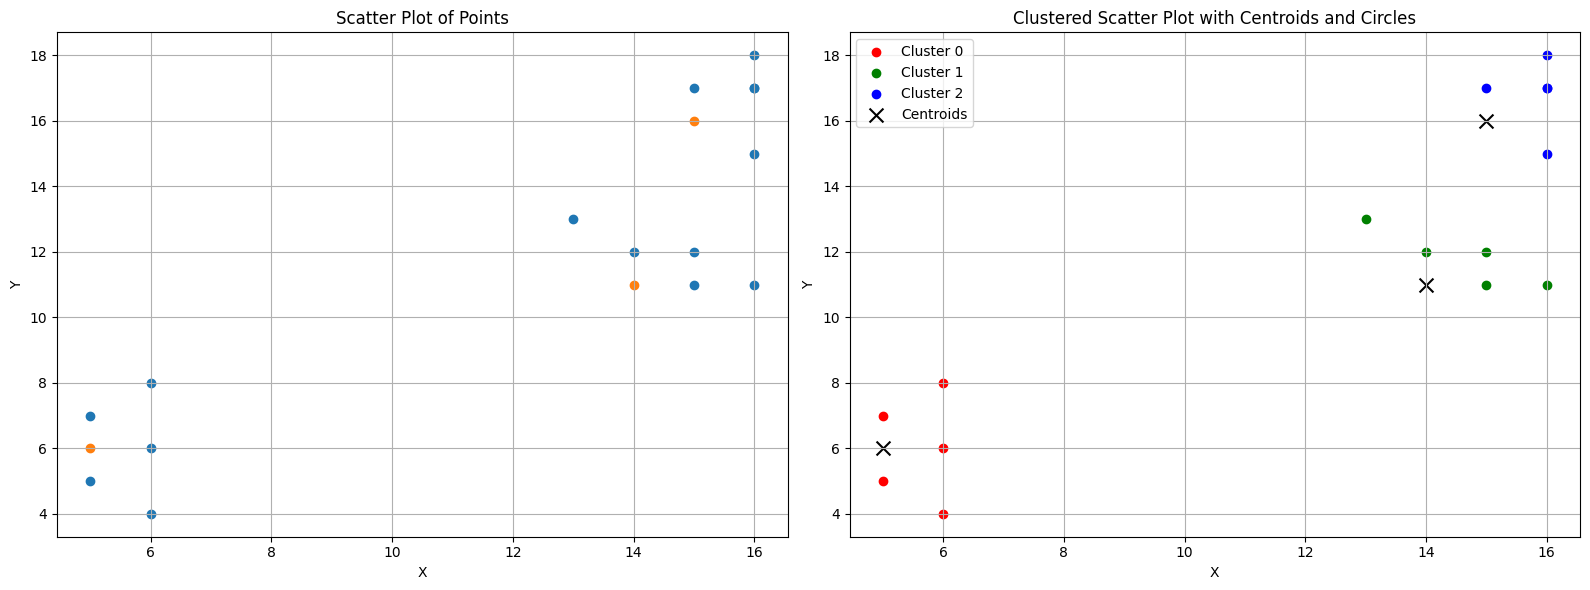

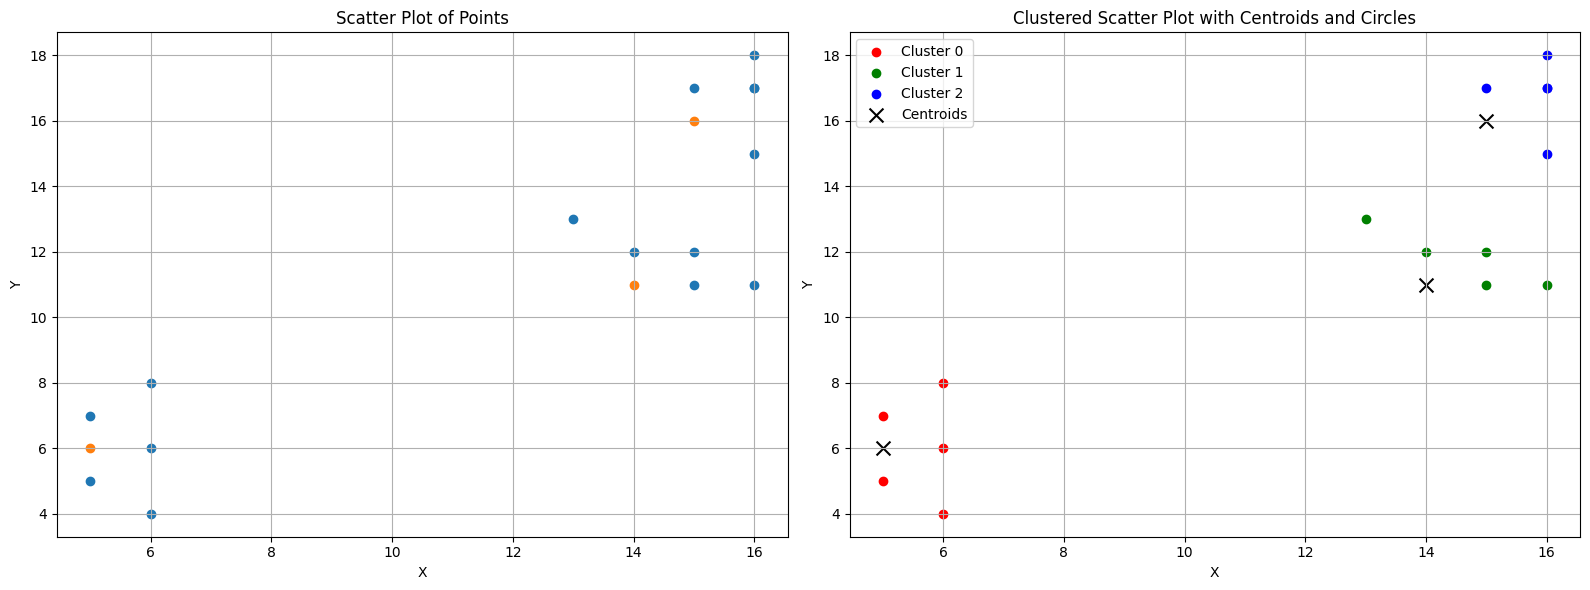

In [8]:
for i in range(3):
    clusters = clustering(points,centroids,k=3)
    plot_clusters(clusters,centroids)
    centroids = calculate_centroids(centroids,clusters,k=3)
    plot_clusters(clusters,centroids)
    